# Using GRNPipeline
## A GRN analysis and visualization tool for the gene of interest

First, the data and package are loaded. This may take a minute. 
Set your gene of interest (GOI) here! 

In [31]:
import sys
sys.path.append('/lustre/groups/ml01/workspace/samantha.bening/Bachelor/')
from importlib import reload
import genereporter.grn_pipeline as ggModule
reload(ggModule)

gg = ggModule.GRNPipeline(wdir="/lustre/groups/ml01/workspace/samantha.bening/Bachelor/", 
                 adata="data2/veo_ibd_balanced_aucell.h5ad",
                 f_adj='src/SCENICfiles/TFtg_adj.csv',
                 f_reg='src/SCENICfiles/reg_full10k.csv', 
                 dir_gg_adj = 'src/SCENICfiles/gg_adj/')

# set GOI
GOI = 'CASP8'

A ranked list of the REACTOME pathway and GRN regulon gene sets that include the GOI. 
The ranking is based on the (absolute value of the) Spearman's correlation coefficient between the genesets AUCell score and the GOI's expression across all cells. 

In [2]:
pathways_goi = gg.get_goi_pathways(GOI)
pathways_goi

geneset genesymbol  correlation
0         REACTOME_REGULATION_OF_NF_KAPPA_B_SIGNALING      CASP8     0.240202
1   REACTOME_CASPASE_ACTIVATION_VIA_DEATH_RECEPTOR...      CASP8     0.225575
2            REACTOME_INTRINSIC_PATHWAY_FOR_APOPTOSIS      CASP8     0.220298
3                   REACTOME_NOD1_2_SIGNALING_PATHWAY      CASP8     0.202713
4   REACTOME_NUCLEOTIDE_BINDING_DOMAIN_LEUCINE_RIC...      CASP8     0.201034
5                         REACTOME_REGULATED_NECROSIS      CASP8     0.200855
6          REACTOME_RIPK1_MEDIATED_REGULATED_NECROSIS      CASP8     0.196787
7               REACTOME_C_TYPE_LECTIN_RECEPTORS_CLRS      CASP8     0.192598
8   REACTOME_CASPASE_ACTIVATION_VIA_EXTRINSIC_APOP...      CASP8     0.190844
9                              REACTOME_TNF_SIGNALING      CASP8     0.183101
10  REACTOME_TAK1_DEPENDENT_IKK_AND_NF_KAPPA_B_ACT...      CASP8     0.181794
11                 REACTOME_CLEC7A_DECTIN_1_SIGNALING      CASP8     0.173996
12                     REACTOME_PROGRAMMED_CELL_DEATH      CASP8     0.173493
13  REACTOME_DDX58_IFIH1_MEDIATED_INDUCTION_OF_INT...      CASP8     0.164175
14                                 REACTOME_APOPTOSIS      CASP8     0.164043
15                  REACTOME_DEATH_RECEPTOR_SIGNALING      CASP8     0.160035
16            REACTOME_INTERLEUKIN_1_FAMILY_SIGNALING      CASP8     0.152561
17                   REACTOME_INTERLEUKIN_1_SIGNALING      CASP8     0.151888
18         REACTOME_DISEASES_OF_PROGRAMMED_CELL_DEATH      CASP8     0.147965
19      REACTOME_TNFR1_INDUCED_PROAPOPTOTIC_SIGNALING      CASP8     0.146780
20                 REACTOME_APOPTOTIC_EXECUTION_PHASE      CASP8     0.129255
21            REACTOME_MYD88_INDEPENDENT_TLR4_CASCADE      CASP8     0.118571
22                                      IKZF2_REGULON      CASP8     0.108758
23   REACTOME_APOPTOTIC_CLEAVAGE_OF_CELLULAR_PROTEINS      CASP8     0.103956
24                                      IKZF1_REGULON      CASP8     0.103613
25                                       ELF1_REGULON      CASP8     0.100515
26                                      GATA3_REGULON      CASP8     0.096939
27                                       CREM_REGULON      CASP8     0.096684
28               REACTOME_TOLL_LIKE_RECEPTOR_CASCADES      CASP8     0.095853
29         REACTOME_TOLL_LIKE_RECEPTOR_9_TLR9_CASCADE      CASP8     0.094180
30      REACTOME_TOLL_LIKE_RECEPTOR_TLR1_TLR2_CASCADE      CASP8     0.091920
31                                      RUNX3_REGULON      CASP8     0.090005
32                                       IRF1_REGULON      CASP8     0.054595
33                                      STAT1_REGULON      CASP8    -0.019003

We show the UMAPs of all the cells, first colored by cell type, then by the GOI expression, followed by the top four gene sets (according to the previous ranking). The color of the pathways corresponds to the AUCell score of that gene set in every cell. 

In [3]:
gg.plot_pathways(pathways_goi, GOI)

## Regulon-level gene set enrichment analysis

Now we look into which pathways are significantly enriched in a specific gene set of interest. 
You can pick which gene set to look at by setting the regulon parameter: <code>regulon=['your gene set']</code>
We recommend looking at regulons, but you can also look at a REACTOME gene set. 
Hover over the individual pathways plotted to see more information. 

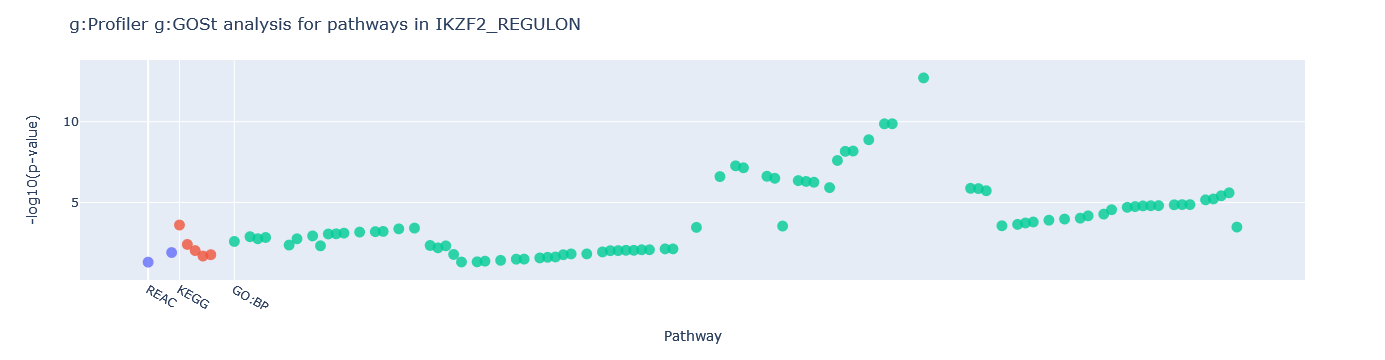

In [5]:
gprofiler = gg.gGOSt(regulon='IKZF2_REGULON') # set gene set of interest here

## TF-Target Gene Network Visualization

Now we can begin to look into specific TF-GOI pairs in the regulon network. 

In [2]:
# GOI text summary:
goi_grn = gg.make_goi_grn(GOI=GOI)
gg.GOI_network_stats(goi_grn, GOI)
gg.format_gene_summary(goi_grn, GOI)

Summary of CASP8:

There are 8 regulons that have CASP8 in their target genes.

Regulons that have CASP8 in their target genes:

	(TF: GRNBoost2 Importance Score)
	IKZF2: 0.583
	IRF1: 0.479
	ELF1: 0.33
	RUNX3: 0.177
	GATA3: 0.161
	CREM: 0.122
	IKZF1: 0.106
	STAT1: 0.1


There are 77 TFs for CASP8 that were NOT supported by a regulon (motif analysis),
here are the top 10:

	(TF: GRNBoost2 Importance Score)
	YWHAZ: 2.754
	EZR: 2.1
	UBE2K: 1.437
	SOD1: 1.025
	ZNF529: 0.961
	LEF1: 0.911
	KLF6: 0.823
	SFPQ: 0.7
	ZNF275: 0.687
	PSMD12: 0.673
	HDAC1: 0.562

CASP8: 

	This gene encodes a member of the cysteine-aspartic acid protease (caspase) family.
	Sequential activation of caspases plays a central role in the execution-phase of
	cell apoptosis. Caspases exist as inactive proenzymes composed of a prodomain, a
	large protease subunit, and a small protease subunit. Activation of caspases requires
	proteolytic processing at conserved internal aspartic residues to generate a heterodimeric enzyme

## Gene-gene Co-Expression Network

We can also look into not only TF-target gene regulatory relationships, but simple gene-gene co-expression patterns. 
Here, we show a gene-gene co-expression matrix for each very coarse cell lineage: B Cells, Epithelium Cells, Myeloid Cells, Stroma Cells, and T Cells. 
Each network is calculated using only gene expression values within these cell lineages. This means that the results here are cell-lineage specific. 

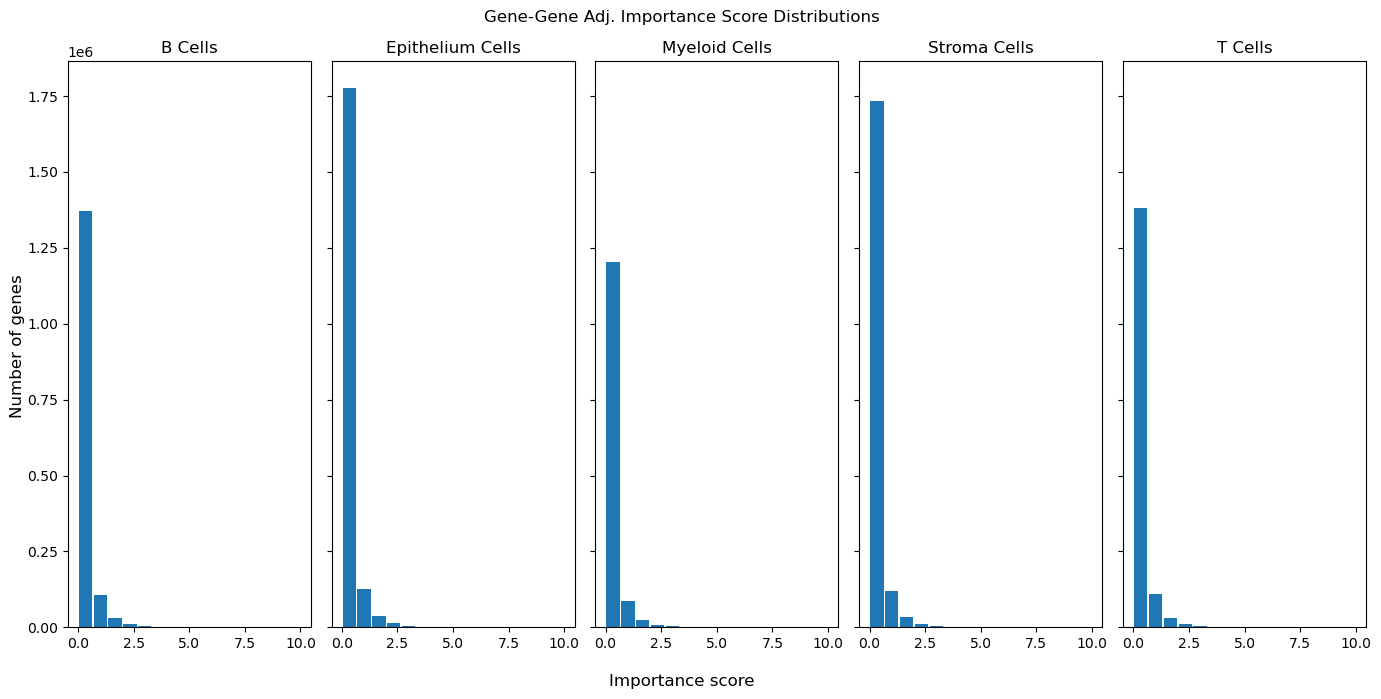

In [18]:
# first: look at importance score distribution for each cell lineage
# set log_scale=True for a log scale of the y-axis (Number of genes)
# set xlim=x for a view of the x-axis from 0 to x 
gg.genegene_importance_histograms(log_scale=False, xlim=10)

You can visualize either the regulon (TF-GOI regulating pairs) or gene-gene (GOI-gene coexpressed pairs) network here. Set the parameter to <code>'regulon'</code> or <code>'gene_gene'</code> for the desired network visualization. The output is interactive, so hover over nodes to see their gene set and move nodes around for a better view! 

In [6]:
# network visualization
# type = 'gene_gene' for the GOI-gene co-expression network
# type = 'regulon' for the TF-GOI regulon network 
# top_n = n: only show top n direct target genes of each TF or gene

gg.show_network(GOI, type='regulon', top_n=5) # only works on jupyter notebook running in browser (not in VS Code for example)

Unable to connect to VS Code server: Error in request.
Error: connect ENOENT /run/user/1000151/vscode-ipc-72974b37-5980-46dc-b10d-6b5fff02b977.sock
    at PipeConnectWrap.afterConnect [as oncomplete] (node:net:1555:16) {
  errno: -2,
  code: 'ENOENT',
  syscall: 'connect',
  address: '/run/user/1000151/vscode-ipc-72974b37-5980-46dc-b10d-6b5fff02b977.sock'
}


We apply the same principle of gene set enrichment analysis within the genes that are co-expressed with the GOI in each distinct cell lineage. We simply provide a list of the top three (or less) significantly enriched pathways from REACTOME and KEGG for each gene set, i.e. each set of genes co-expressed with the GOI within each cell lineage. 

In [5]:
gg.gGOSt_listed(GOI)

Top 3 significantly differentially expressed pathways in genes co-expressed with CASP8, per cell lineage.
This is in REACTOME and KEGG databases.

In b_cell cells:
Chemical carcinogenesis - reactive oxygen species (p-value: 6.962516250823133e-05)
Parkinson disease (p-value: 9.276781736818912e-05)
Pathways of neurodegeneration - multiple diseases (p-value: 0.00029275472393432405)


In epithelium cells:
Salmonella infection (p-value: 0.0006470528854317268)
Endosomal/Vacuolar pathway (p-value: 0.0028136518951242927)
EPH-Ephrin signaling (p-value: 0.006122716684392412)


In myeloid cells:
Viral myocarditis (p-value: 0.006700895160108687)
mRNA Splicing (p-value: 0.013791609164411713)
Interferon gamma signaling (p-value: 0.02805819662400579)


In stroma cells:
No significant pathways found.


In t_cell cells:
mRNA Splicing - Major Pathway (p-value: 0.0044740380794107)
mRNA Splicing (p-value: 0.006595281995211552)


